Eval Using created Data from global sets

In [31]:
# Setup and Import data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from ydata_profiling.visualisation.plot import timeseries_heatmap
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as tsa
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from autots import AutoTS
from autots.models import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from datetime import timedelta

In [32]:
# Read data
createdDataFinal = pd.read_csv('createdData.csv')
# Turn date col to data type date time
createdDataFinal['Date'] = pd.to_datetime(createdDataFinal['Date'], format='%d/%m/%Y')
createdDataFinal.head()

,Date,Temp,ED Attends,Pollution,Passengers,Births,Electric Production,Drug Sales,Beer Production
0,1981-01-01,20.7,164.0,129.0,112.0,35.0,72.5052,3.526591,93.2
1,1981-01-02,17.9,269.0,148.0,118.0,32.0,70.6720,3.180891,96.0
2,1981-01-03,18.8,209.0,159.0,132.0,30.0,62.4502,3.252221,95.2
3,1981-01-04,14.6,205.0,181.0,129.0,31.0,57.4714,3.611003,77.1
4,1981-01-05,15.8,193.0,138.0,121.0,44.0,55.3151,3.565869,70.9


In [33]:
createdDataFinal.tail()

,Date,Temp,ED Attends,Pollution,Passengers,Births,Electric Production,Drug Sales,Beer Production
3645,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3646,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3647,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3648,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3649,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Check missing values of the dataset
createdDataFinal.isnull().sum()

Date                   3506
Temp                   3506
ED Attends             3506
Pollution              3506
Passengers             3506
Births                 3506
Electric Production    3506
Drug Sales             3506
Beer Production        3506
dtype: int64

In [35]:
#Drop NaN values
createdData = createdDataFinal.dropna()

In [36]:
createdData.tail()

,Date,Temp,ED Attends,Pollution,Passengers,Births,Electric Production,Drug Sales,Beer Production
139,1981-05-20,2.1,84.0,67.0,606.0,36.0,86.5562,9.800215,116.0
140,1981-05-21,3.4,79.0,106.0,508.0,55.0,79.1919,10.816994,113.9
141,1981-05-22,5.4,84.0,159.0,461.0,41.0,74.6891,10.654223,127.5
142,1981-05-23,9.6,87.0,198.0,390.0,45.0,81.0740,12.512323,131.4
143,1981-05-24,11.5,108.0,190.0,432.0,41.0,90.4855,12.161210,145.9


In [37]:
# Re Check Missing 
createdData.isnull().sum()

Date                   0
Temp                   0
ED Attends             0
Pollution              0
Passengers             0
Births                 0
Electric Production    0
Drug Sales             0
Beer Production        0
dtype: int64

In [38]:
#Check shape of data
createdData.shape
# 144 Rows / 9 Columns 

(144, 9)

In [39]:
# Check data types
createdData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 144 non-null    datetime64[ns]
 1   Temp                 144 non-null    float64       
 2   ED Attends           144 non-null    float64       
 3   Pollution            144 non-null    float64       
 4   Passengers           144 non-null    float64       
 5   Births               144 non-null    float64       
 6   Electric Production  144 non-null    float64       
 7   Drug Sales           144 non-null    float64       
 8   Beer Production      144 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 11.2 KB


In [40]:
# Get Data Statistics 
createdData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp,144.0,14.197222,4.454603,2.10000,11.150000,14.55000,16.900000,25.00000
ED Attends,144.0,133.888889,45.619912,34.00000,91.750000,142.00000,167.250000,269.00000
Pollution,144.0,70.666667,46.977007,20.00000,29.000000,55.00000,96.500000,198.00000
Passengers,144.0,280.298611,119.966317,104.00000,180.000000,265.50000,360.500000,622.00000
Births,144.0,39.645833,7.273353,23.00000,34.000000,39.00000,45.000000,58.00000
Electric Production,144.0,73.262574,9.086771,55.31510,67.253175,73.32900,79.205325,98.97320
Drug Sales,144.0,7.593111,3.178084,2.81452,5.092465,6.93973,9.940282,16.82835
Beer Production,144.0,97.410417,17.256501,64.80000,84.875000,96.00000,107.450000,145.90000


In [41]:
# Get Correlation Stats
createdData.corr()

C:\Users\pgrady\AppData\Local\Temp\ipykernel_6224\112285303.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  createdData.corr()


,Temp,ED Attends,Pollution,Passengers,Births,Electric Production,Drug Sales,Beer Production
Temp,1.000000,0.581934,0.248823,-0.721366,-0.082091,-0.565377,-0.693246,-0.416321
ED Attends,0.581934,1.000000,0.077842,-0.669331,-0.059615,-0.499571,-0.714852,-0.458416
Pollution,0.248823,0.077842,1.000000,-0.392834,0.074109,-0.362984,-0.345485,-0.030202
Passengers,-0.721366,-0.669331,-0.392834,1.000000,-0.004021,0.684652,0.887231,0.396567
Births,-0.082091,-0.059615,0.074109,-0.004021,1.000000,-0.062855,-0.005100,-0.028057
Electric Production,-0.565377,-0.499571,-0.362984,0.684652,-0.062855,1.000000,0.664795,0.514091
Drug Sales,-0.693246,-0.714852,-0.345485,0.887231,-0.005100,0.664795,1.000000,0.395766
Beer Production,-0.416321,-0.458416,-0.030202,0.396567,-0.028057,0.514091,0.395766,1.000000


In [42]:
#Change to df
df_raw = pd.DataFrame(createdData)
df_raw.head()

,Date,Temp,ED Attends,Pollution,Passengers,Births,Electric Production,Drug Sales,Beer Production
0,1981-01-01,20.7,164.0,129.0,112.0,35.0,72.5052,3.526591,93.2
1,1981-01-02,17.9,269.0,148.0,118.0,32.0,70.6720,3.180891,96.0
2,1981-01-03,18.8,209.0,159.0,132.0,30.0,62.4502,3.252221,95.2
3,1981-01-04,14.6,205.0,181.0,129.0,31.0,57.4714,3.611003,77.1
4,1981-01-05,15.8,193.0,138.0,121.0,44.0,55.3151,3.565869,70.9


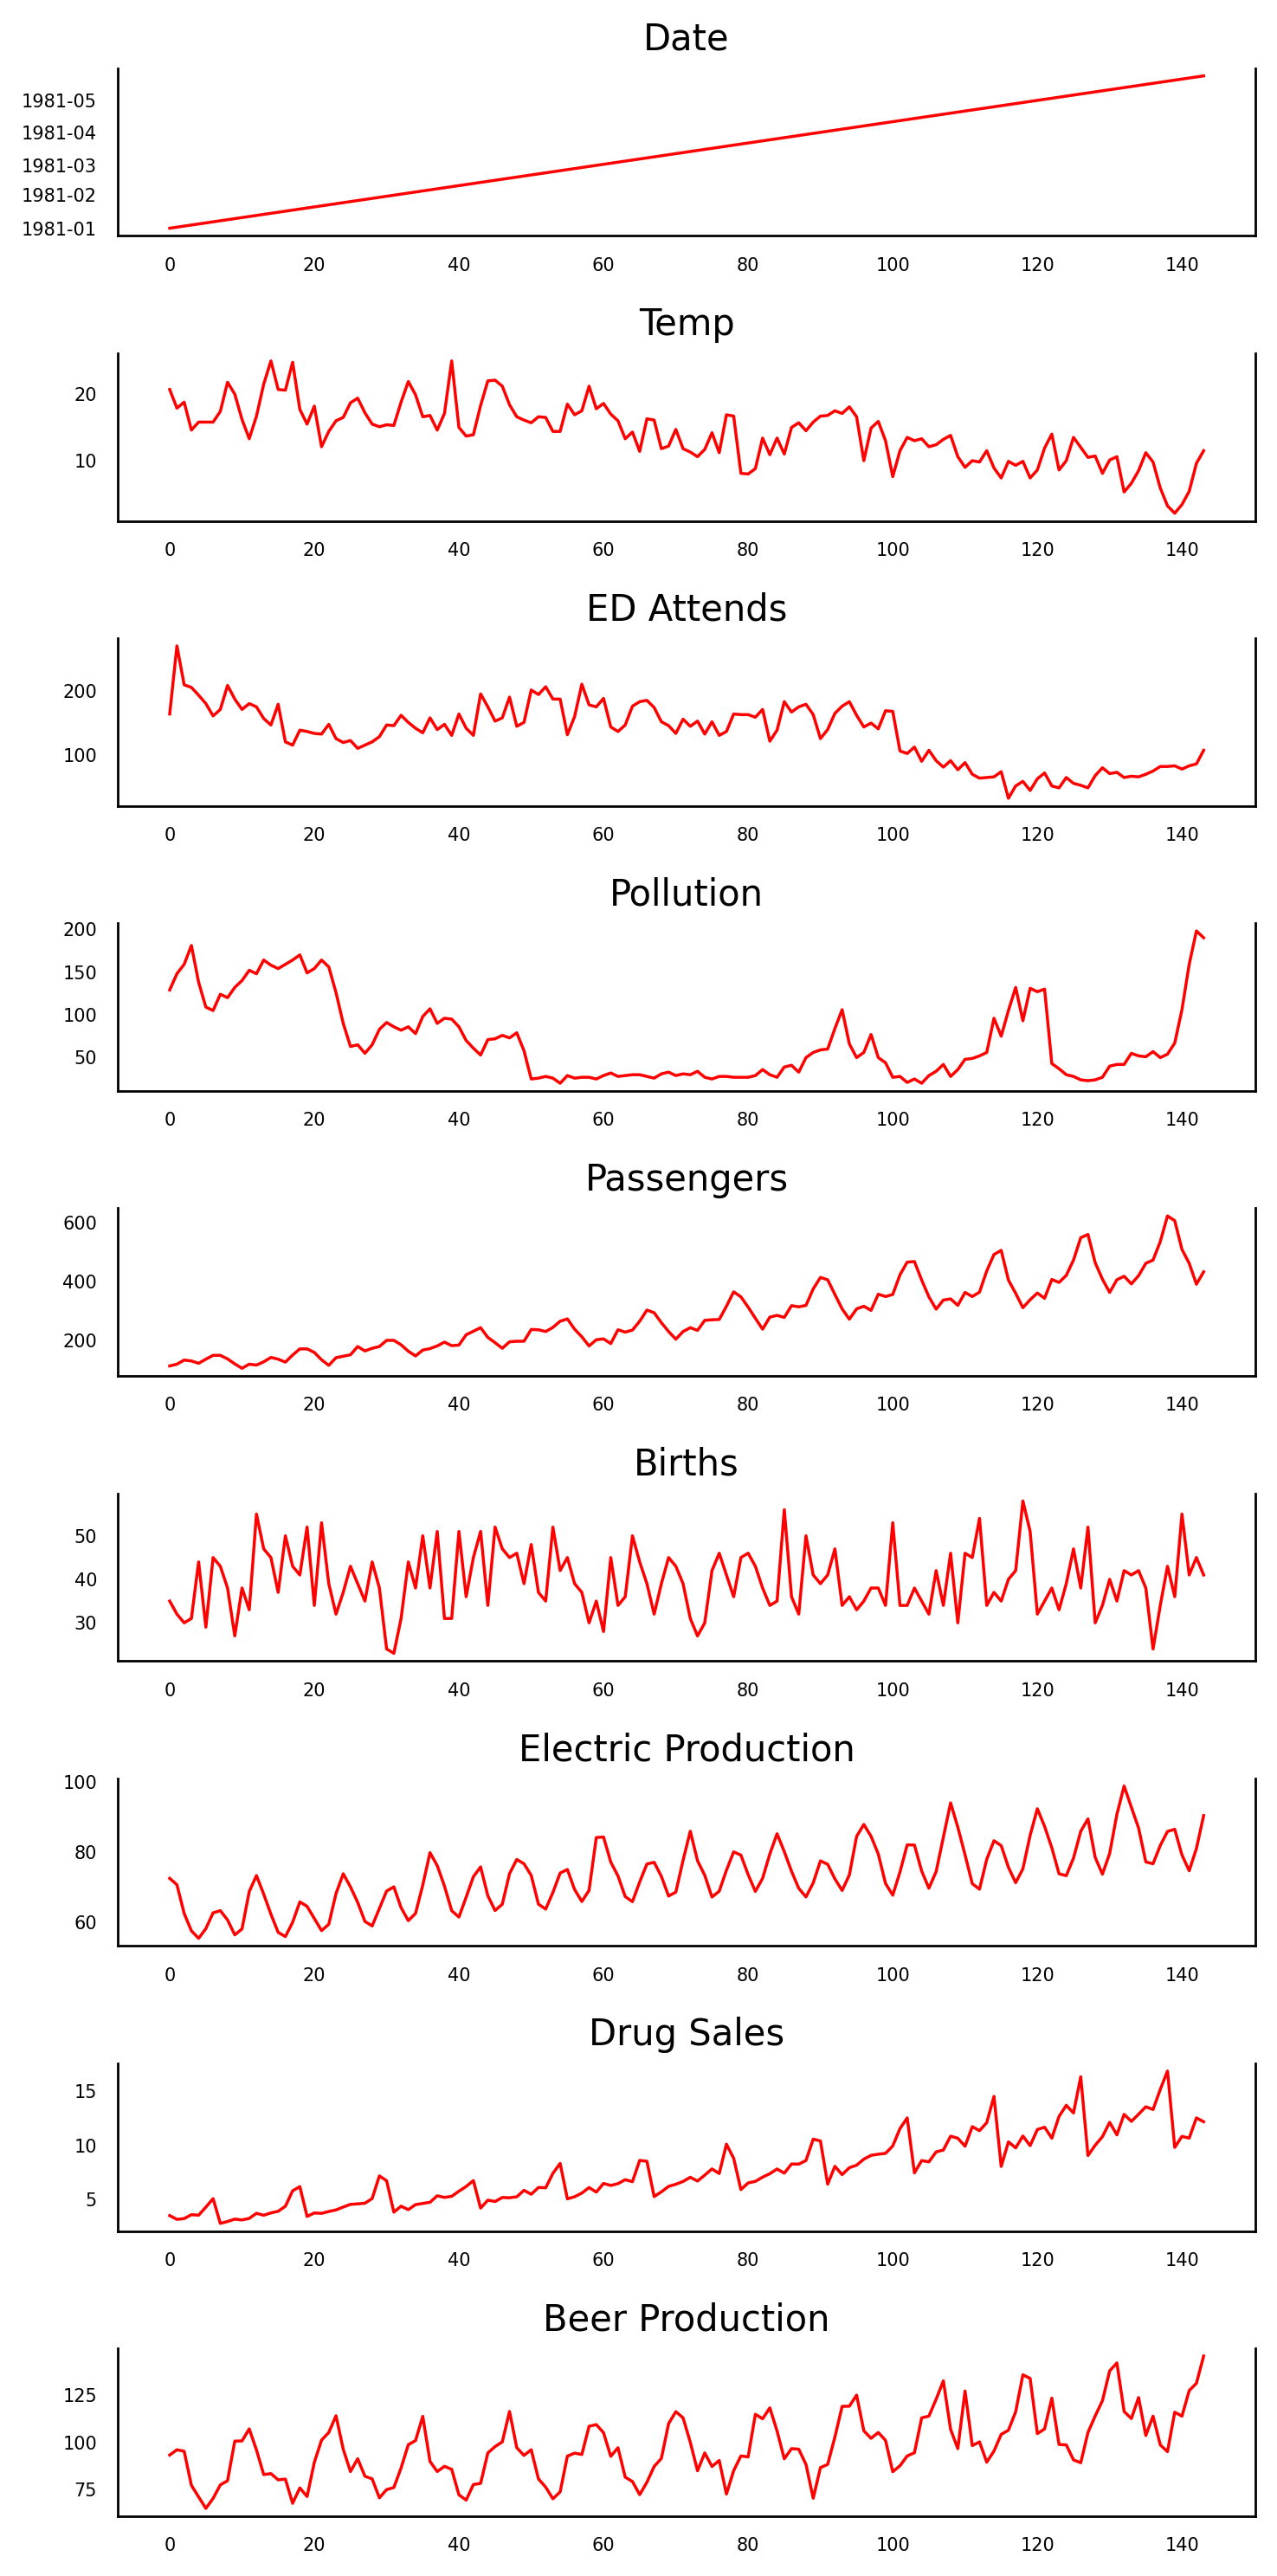

In [43]:
''' Visualise Routine data for all specialties
'''
# Plot All Specialties that are Urgent
fig, axes = plt.subplots(nrows=9, ncols=1, dpi=250, figsize=(6,12))
for i, ax in enumerate(axes.flatten()):
    data = df_raw[df_raw.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_raw.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [44]:
# ADF Test
# Get P-Value for all specialties in Routine
df_p_value_results = {}

for col in df_raw.columns.values:  #or edit this for a subset of columns first
    df_p_value_results[col] = tsa.adfuller(df_raw[col])[1]

df_p_value_results

{'Date': 0.9504437807793229,
 'Temp': 0.049226781020672676,
 'ED Attends': 0.5934107496520763,
 'Pollution': 0.24029508628004465,
 'Passengers': 0.991880243437641,
 'Births': 2.4187192354474617e-20,
 'Electric Production': 0.9065490308970531,
 'Drug Sales': 0.9979233477139685,
 'Beer Production': 0.9987998384172254}

out_array :           Temp  ED Attends  Pollution  Passengers    Births  \
0    3.077312    5.105945   4.867534    4.727388  3.583519   
1    2.939162    5.598422   5.003946    4.779123  3.496508   
2    2.985682    5.347108   5.075174    4.890349  3.433987   
3    2.747271    5.327876   5.204007    4.867534  3.465736   
4    2.821379    5.267858   4.934474    4.804021  3.806662   
..        ...         ...        ...         ...       ...   
139  1.131402    4.442651   4.219508    6.408529  3.610918   
140  1.481605    4.382027   4.672829    6.232448  4.025352   
141  1.856298    4.442651   5.075174    6.135565  3.737670   
142  2.360854    4.477337   5.293305    5.968708  3.828641   
143  2.525729    4.691348   5.252273    6.070738  3.737670   

     Electric Production  Drug Sales  Beer Production  
0               4.297356    1.509969         4.545420  
1               4.272100    1.430524         4.574711  
2               4.150255    1.447441         4.566429  
3               4.

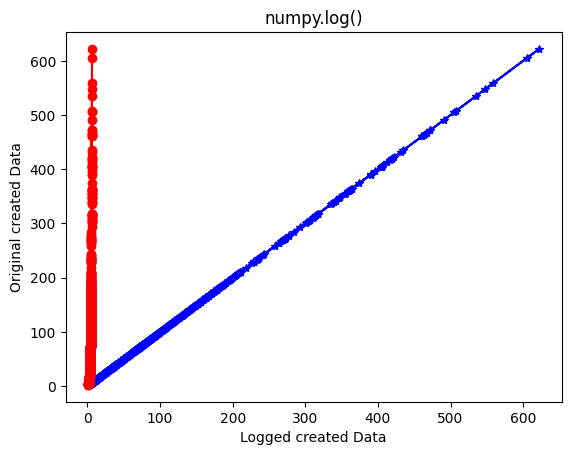

In [45]:
# Showing Graphical representation of log1p() function
import numpy as np
import matplotlib.pyplot as plt
  
in_array = df_raw.drop(columns=['Date'])
loggedDfRaw = np.log1p(in_array)
  
print ("out_array : ", loggedDfRaw)
  
plt.plot(in_array, in_array, 
         color = 'blue', marker = "*")
  
# red for numpy.log()
plt.plot(loggedDfRaw, in_array, 
         color = 'red', marker = "o")
           
plt.title("numpy.log()")
plt.xlabel("Logged created Data")
plt.ylabel("Original created Data")
plt.show() 

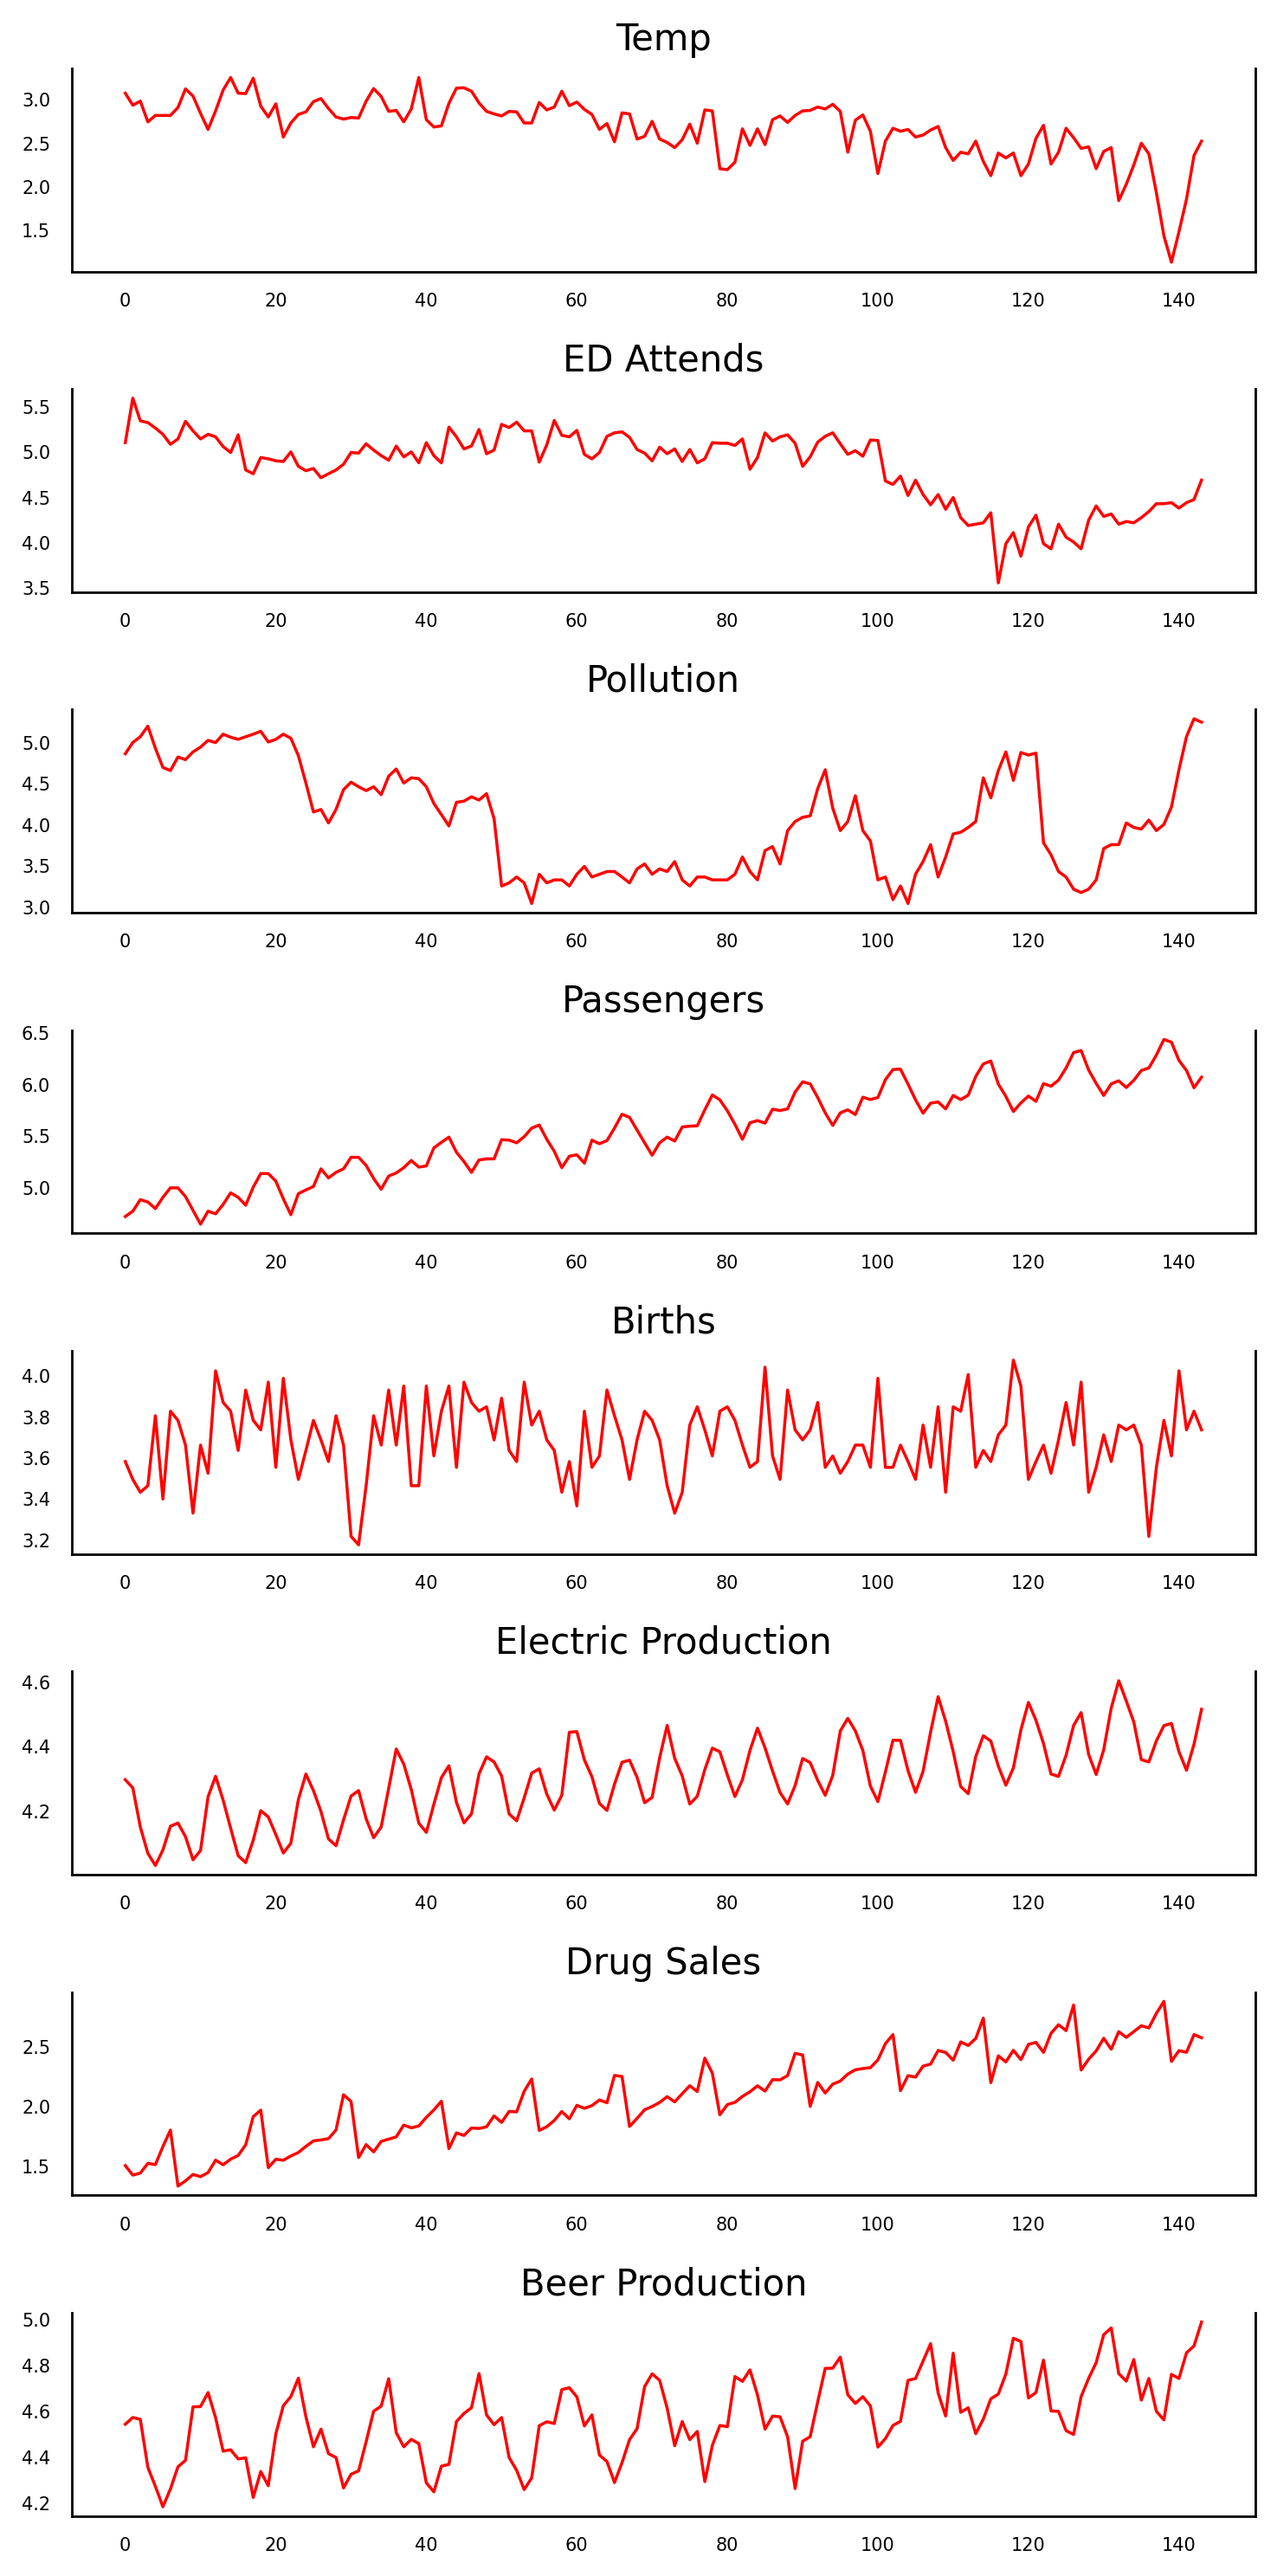

In [46]:
# Plot all logged data
fig, axes = plt.subplots(nrows=8, ncols=1, dpi=250, figsize=(6,12))
for i, ax in enumerate(axes.flatten()):
    data = loggedDfRaw[loggedDfRaw.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(loggedDfRaw.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [47]:
#View head of logged df

loggedDfRaw.head()

,Temp,ED Attends,Pollution,Passengers,Births,Electric Production,Drug Sales,Beer Production
0,3.077312,5.105945,4.867534,4.727388,3.583519,4.297356,1.509969,4.545420
1,2.939162,5.598422,5.003946,4.779123,3.496508,4.272100,1.430524,4.574711
2,2.985682,5.347108,5.075174,4.890349,3.433987,4.150255,1.447441,4.566429
3,2.747271,5.327876,5.204007,4.867534,3.465736,4.068538,1.528445,4.357990
4,2.821379,5.267858,4.934474,4.804021,3.806662,4.030963,1.518609,4.275276


In [48]:
#Add 'Date' col back to logged data
date_column = createdDataFinal['Date']
loggedDfRaw = pd.concat([date_column, loggedDfRaw], axis = 1)

#Set Date col as index
loggedDfRaw = loggedDfRaw.set_index('Date')

#Rename df
df = loggedDfRaw

#View head
df.head()

,Temp,ED Attends,Pollution,Passengers,Births,Electric Production,Drug Sales,Beer Production
Date,,,,,,,,
1981-01-01,3.077312,5.105945,4.867534,4.727388,3.583519,4.297356,1.509969,4.545420
1981-01-02,2.939162,5.598422,5.003946,4.779123,3.496508,4.272100,1.430524,4.574711
1981-01-03,2.985682,5.347108,5.075174,4.890349,3.433987,4.150255,1.447441,4.566429
1981-01-04,2.747271,5.327876,5.204007,4.867534,3.465736,4.068538,1.528445,4.357990
1981-01-05,2.821379,5.267858,4.934474,4.804021,3.806662,4.030963,1.518609,4.275276


In [49]:
#Split data into Train and test 
#Set the number of days used for testing - 28 days
test_days = 28

#Create a copy of the dataframe and sort by date
df_sorted = df_raw.copy().sort_index()

#Split the dataframe into training and testing sets
train = df_sorted.iloc[:-test_days]
test = df_sorted.iloc[-test_days:]

#Display shape of train and test sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (116, 9)
Testing set shape: (28, 9)


In [50]:
#Create Xgboost model
model = xgb.XGBRegressor(random_state = 0, objective='reg:squarederror', n_estimators = 1000)

#Creat a list of column names for numeric columns 
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

In [51]:
#Create an empty df to store forecasts
globalForecasts = pd.DataFrame(index=pd.date_range(start=df.index[115]+timedelta(days=1), periods=28, freq='D'), columns=numeric_cols)
#Create empty dictionary to store mae scores
mae_dict = {}

In [52]:
#Loop through each numeric column 
for col_name in numeric_cols:
    #Create lag features
    train_shifted = train[[col_name]].shift(1).dropna()
    X_train = train_shifted.iloc[:-28]
    y_train = train_shifted[col_name].iloc[:-28]
    X_test = train_shifted.iloc[-28:]
    y_test = test[col_name].iloc[-28:]
    #Fit xgboost model on training data
    model.fit(X_train, y_train)
    #Predict the next 28 days for current column
    predictions = model.predict(train_shifted.iloc[-28:])
    #Store predictions in forecast df
    globalForecasts.loc[:, col_name] = predictions
    #Calculate MAE score 
    mae = mean_absolute_error(y_test, predictions)
    #Store the MAE score in dictionary
    mae_dict[col_name] = mae

C:\Users\pgrady\AppData\Local\Temp\ipykernel_6224\1281278075.py:14: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  globalForecasts.loc[:, col_name] = predictions
C:\Users\pgrady\AppData\Local\Temp\ipykernel_6224\1281278075.py:14: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  globalForecasts.loc[:, col_name] = predictions
C:\Users\pgrady\AppData\Local\Temp\ipykernel_6224\1281278075.py:14: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior

In [53]:
#Loop to get mae scores for each target col
for col_name, mae in mae_dict.items():
    print(f"{col_name}: {mae}")

Temp: 4.978709036963326
ED Attends: 67.32169369288853
Pollution: 43.214149951934814
Passengers: 103.92874036516461
Births: 8.678791182381767
Electric Production: 8.032800194004604
Drug Sales: 2.925487170181231
Beer Production: 21.356970814296176


In [54]:
predictions

array([ 96.29999 ,  87.197296,  70.1     ,  86.30244 ,  87.197296,
       101.09699 , 118.29875 , 118.29875 , 118.29875 , 105.996864,
       101.09699 , 105.19993 , 101.09699 ,  84.39998 ,  87.197296,
        92.70035 ,  94.29951 , 113.001945, 113.79997 , 118.29875 ,
       118.29875 , 107.0998  ,  96.59677 , 118.29875 ,  98.70329 ,
       100.200455,  89.30421 ,  95.19621 ], dtype=float32)

In [55]:
y_test

116    106.4
117    116.2
118    135.9
119    134.0
120    104.6
121    107.1
122    123.5
123     98.8
124     98.6
125     90.6
126     89.1
127    105.2
128    114.0
129    122.1
130    138.0
131    142.2
132    116.4
133    112.6
134    123.8
135    103.6
136    113.9
137     98.6
138     95.0
139    116.0
140    113.9
141    127.5
142    131.4
143    145.9
Name: Beer Production, dtype: float64

In [56]:
globalForecasts

,Temp,ED Attends,Pollution,Passengers,Births,Electric Production,Drug Sales,Beer Production
1981-04-27,15.700523,175.000015,32.999889,311.997772,32.000511,69.303085,8.275284,96.299988
1981-04-28,14.599886,179.000214,52.996555,316.999908,50.000336,67.150429,8.606736,87.197296
1981-04-29,15.799108,163.001297,55.002457,363.998627,40.998856,71.470352,10.094936,70.099998
1981-04-30,16.699194,125.997932,57.997723,363.998627,39.000275,77.559746,10.094936,86.302437
1981-05-01,16.802303,139.994827,61.002956,363.998627,40.998856,76.613838,6.412095,87.197296
1981-05-02,17.500200,164.000259,83.000816,346.999878,46.999073,72.505142,8.275284,101.096992
1981-05-03,17.099821,176.004044,106.999672,301.999908,33.999943,69.071442,7.247248,118.298752
1981-05-04,18.197651,183.001617,65.000404,272.001862,36.000031,73.572517,7.822558,118.298752
1981-05-05,16.600595,161.996582,52.996555,301.999908,32.996155,84.358330,8.275284,118.298752
1981-05-06,10.601816,143.998108,55.002457,315.002289,35.000496,86.020149,8.798247,105.996864


In [57]:
#Round Predictions to nearest whole number
forecast_df = round(globalForecasts)
forecast_df

,Temp,ED Attends,Pollution,Passengers,Births,Electric Production,Drug Sales,Beer Production
1981-04-27,16.0,175.0,33.0,312.0,32.0,69.0,8.0,96.0
1981-04-28,15.0,179.0,53.0,317.0,50.0,67.0,9.0,87.0
1981-04-29,16.0,163.0,55.0,364.0,41.0,71.0,10.0,70.0
1981-04-30,17.0,126.0,58.0,364.0,39.0,78.0,10.0,86.0
1981-05-01,17.0,140.0,61.0,364.0,41.0,77.0,6.0,87.0
1981-05-02,18.0,164.0,83.0,347.0,47.0,73.0,8.0,101.0
1981-05-03,17.0,176.0,107.0,302.0,34.0,69.0,7.0,118.0
1981-05-04,18.0,183.0,65.0,272.0,36.0,74.0,8.0,118.0
1981-05-05,17.0,162.0,53.0,302.0,33.0,84.0,8.0,118.0
1981-05-06,11.0,144.0,55.0,315.0,35.0,86.0,9.0,106.0
